# Wordle best words

*Forked from [nehadyounis/wordle_best_words](https://github.com/nehadyounis/wordle_best_words), updated with weights by location*

*By Spencer Fretwell*

*Date: 03-19-2022*

In [201]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib as plt
import matplotlib.pyplot as plt
import copy

In [2]:
with open('words_alpha.txt') as f:
    lines = f.readlines()

In [3]:
len(lines)

370103

In [4]:
words5 = []
for word in lines:
    word = word.replace("\n", "")
    w = word.replace("\n", "")
    if len(w) == 5:
        words5.append(w)
len(words5)

15918

In [202]:
wordsWithoutRepeated = []
for word in words5:
    w = ""
    for letter in word:
        if w.find(letter) == -1:
            w += letter
    if (len(w) == 5):
        wordsWithoutRepeated.append(w)
len(wordsWithoutRepeated)

10173

<BarContainer object of 26 artists>

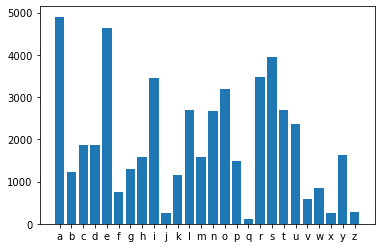

In [6]:
weights = {}
for i in range(26):
    weights[chr(i+97)] = 0

for word in wordsWithoutRepeated:
    for letter in word:
        if (ord(letter) - 97) > -1:
            weights[letter] +=1
plt.bar (weights.keys(), weights.values())

In [7]:
scores = {}
for word in wordsWithoutRepeated:
    for letter in word:
        scores[word] = scores.get(word,0) + weights.get(letter,0)
max_key = max(scores, key=scores.get)
max_key

'aesir'

In [8]:
result = []
weights2 = weights.copy()
for i in range(5):
    scores = {}
    for word in wordsWithoutRepeated:
        for letter in word:
            scores[word] = scores.get(word,0) + weights2.get(letter,0)
    max_key = max(scores, key=scores.get)
    result.append(max_key)
    for letter in max_key:
        weights2[letter] = 0
result

['aesir', 'clout', 'nymph', 'badge', 'flowk']

> So begin my changes  
> -- Spencer Fretwell

In [206]:
forbidden = ['bekah', 'frike'] # Not in squabble.me dictionary

final_words = []
for word in wordsWithoutRepeated:
    if word not in forbidden:
        final_words.append(word)
        
wordsWithoutRepeated = final_words
len(wordsWithoutRepeated)

10169

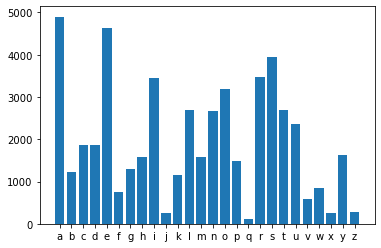

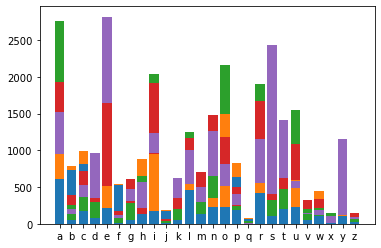

In [208]:
weights = {}
for i in range(26):
    weights[chr(i+97)] = 0

for word in wordsWithoutRepeated:
    for letter in word:
        if (ord(letter) - 97) > -1:
            weights[letter] +=1
            
weights_by_loc = weights.copy()
for i in weights:
    weights_by_loc[i] = [0]*5
            

for word in wordsWithoutRepeated:
    for i, letter in enumerate(word):
        if (ord(letter) - 97) > -1:
            weights_by_loc[letter][i] += 1

plt.bar(weights.keys(), weights.values())
plt.show()

btm = [0]*len(weights_by_loc)
for i in range(5):
    tp = [val[i] for key, val in weights_by_loc.items()]
    if i>0:
        btm = [val[i-1] for key, val in weights_by_loc.items()]
    plt.bar(weights_by_loc.keys(), tp, bottom=btm)

In [209]:
result = []
weight_by_letter = weights.copy()
weight_by_location = copy.deepcopy(weights_by_loc)
for i in range(5):
    wordsWithoutRepeatedDec = {}
    for word in wordsWithoutRepeated:
        for j, letter in enumerate(word):
            wordsWithoutRepeatedDec[word] = wordsWithoutRepeatedDec.get(word,0) + weight_by_letter[letter] + weight_by_location[letter][j]
    max_key = max(wordsWithoutRepeatedDec, key=wordsWithoutRepeatedDec.get)
    for i, letter in enumerate(max_key):
        weight_by_letter[letter] = 0
        weight_by_location[letter][i] = 0
    result.append((max_key, wordsWithoutRepeatedDec[max_key]))
    
result

[('tares', 26804),
 ('colin', 18411),
 ('dumpy', 12145),
 ('bigha', 7018),
 ('flake', 5555)]

In [210]:
test = {
    1: ['slice', 'morph', 'tawny', 'afoul'],
    2: ['query', 'block', 'pawns', 'fight'],
    3: ['fakes', 'glory', 'bundt', 'chimp'],
    5: ['tares', 'colin', 'dumpy', 'bhang']
}

def tester(test_dict):
    results = test_dict
    for i in test_dict:
        result = {}
        weight_by_letter = weights.copy()
        weight_by_location = copy.deepcopy(weights_by_loc)
        for word in test[i]:
            for j, letter in enumerate(word):
                result[word] = result.get(word,0) + weight_by_letter[letter] + weight_by_location[letter][j]
                weight_by_letter[letter] = 0
                weight_by_location[letter][j] = 0
        result['total ---'] = sum(result.values())
        results[i] = result
    return results


tester(test)

{1: {'slice': 20793,
  'morph': 15098,
  'tawny': 17034,
  'afoul': 5361,
  'total ---': 58286},
 2: {'query': 15343,
  'block': 12824,
  'pawns': 19150,
  'fight': 12685,
  'total ---': 60002},
 3: {'fakes': 21564,
  'glory': 15690,
  'bundt': 14501,
  'chimp': 12716,
  'total ---': 64471},
 5: {'tares': 26804,
  'colin': 18411,
  'dumpy': 12145,
  'bhang': 7168,
  'total ---': 64528}}